In [3]:
# load the data

import pandas as pd

mooc = pd.read_csv('big_student_clear_third_version.csv')
mooc.head()

,Unnamed: 0,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24
3,20,HarvardX,CS50x,2012,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0.0,2012-07-24,2013-07-15,25,2,197757,4,0,0,20
4,22,HarvardX,PH207x,2012,Fall,MHxPC130317399,0,0,0,Australia,...,0.0,2012-07-24,2012-08-25,3,2,197757,0,0,0,32


This dataset contains data of years 2012 and 2013 of 13 massively open online courses (MOOCs)offered by MIT and Harvared univercities.One of the major recurring issues raised in academic literature is the consistently high dropout rate of MOOC learners. Although many thousands of participants enrolled on these courses, the completion rate for most courses is below 13% according to bibliography.

In [2]:
mooc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416921 entries, 0 to 416920
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         416921 non-null  int64  
 1   institute          416921 non-null  object 
 2   course_id          416921 non-null  object 
 3   year               416921 non-null  int64  
 4   semester           416921 non-null  object 
 5   userid_DI          416921 non-null  object 
 6   viewed             416921 non-null  int64  
 7   explored           416921 non-null  int64  
 8   certified          416921 non-null  int64  
 9   final_cc_cname_DI  416921 non-null  object 
 10  LoE_DI             416921 non-null  object 
 11  gender             393710 non-null  object 
 12  grade              416921 non-null  float64
 13  start_time_DI      416921 non-null  object 
 14  last_event_DI      416921 non-null  object 
 15  nevents            416921 non-null  int64  
 16  nd

In [3]:
mooc.describe()

,Unnamed: 0,year,viewed,explored,certified,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
count,416921.00000,416921.000000,416921.000000,416921.000000,416921.000000,416921.000000,416921.000000,416921.000000,416921.000000,416921.000000,416921.000000,416921.000000,416921.000000
mean,340862.07322,2012.568117,0.710734,0.077605,0.035712,0.040403,376.685202,5.230768,121245.853404,2.659156,0.018459,0.029056,26.914200
std,151846.24111,0.495339,0.453422,0.267549,0.185571,0.163640,1348.805466,10.841738,96272.717654,4.303406,0.190952,0.167963,8.559383
min,4.00000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,237590.00000,2012.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,21.000000
50%,353688.00000,2013.000000,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,197757.000000,1.000000,0.000000,0.000000,25.000000
75%,466076.00000,2013.000000,1.000000,0.000000,0.000000,0.000000,135.000000,4.000000,197757.000000,3.000000,0.000000,0.000000,30.000000
max,583005.00000,2013.000000,1.000000,1.000000,1.000000,1.000000,53180.000000,205.000000,197757.000000,48.000000,8.000000,1.000000,82.000000


we observe that the attributes : nevents, nchapters, nforum_posts and age are skewed. Also, min(age)= -1 so we need to clean the data.

In [4]:
for col in mooc.columns:
    print('\nUnique values of',col, 'are : ',mooc[col].unique(), "\nand Number of Unique values:",
              len(mooc[col].unique()))
        
print("\nNumber of duplicated rows: ",mooc.duplicated().sum())


Unique values of Unnamed: 0 are :  [     4      6      7 ... 583003 583004 583005] 
and Number of Unique values: 416921

Unique values of institute are :  ['HarvardX' 'MITx'] 
and Number of Unique values: 2

Unique values of course_id are :  ['PH207x' 'CS50x' 'ER22x' 'CB22x' 'PH278x' '6.002x' '14.73x' '6.00x'
 '8.02x' '7.00x' '8.MReV' '3.091x' '2.01x'] 
and Number of Unique values: 13

Unique values of year are :  [2012 2013] 
and Number of Unique values: 2

Unique values of semester are :  ['Fall' 'Summer' 'Spring'] 
and Number of Unique values: 3

Unique values of userid_DI are :  ['MHxPC130313697' 'MHxPC130237753' 'MHxPC130202970' ... 'MHxPC130184108'
 'MHxPC130359782' 'MHxPC130098513'] 
and Number of Unique values: 335650

Unique values of viewed are :  [0 1] 
and Number of Unique values: 2

Unique values of explored are :  [0 1] 
and Number of Unique values: 2

Unique values of certified are :  [0 1] 
and Number of Unique values: 2

Unique values of final_cc_cname_DI are :  ['Ind

In [4]:
# drop columns with no metadata about their content and rename some columns to facilitate the analysis.

mooc = mooc.drop(columns=['Unnamed: 0','gender','incomplete_flag'])
mooc = mooc.rename(columns={"userid_DI": "userid", "final_cc_cname_DI": "country","LoE_DI":"education",
                            "start_time_DI":"start_time", "last_event_DI":"last_event" }) 

In [5]:
# drop the lines where age < 5

mooc = mooc.drop(mooc[mooc['age']< 5].index)  # 279 rows

<AxesSubplot:>

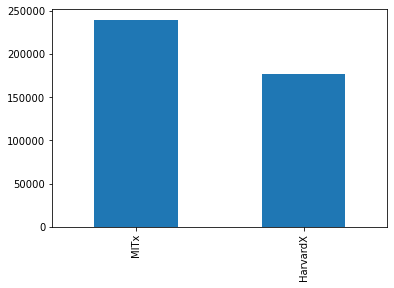

In [44]:
# number of data originated from each institute.

mooc['institute'].value_counts().plot.bar()

In [6]:
import numpy as np
n = np.sum(mooc.groupby('userid')['institute'].count()>1)
print('out of the 335650 students',n," of them have taken a course in both universities, which corresponds to ",
     round((n/335650)*100,1),'% of the students')

out of the 335650 students 58765  of them have taken a course in both universities, which corresponds to  17.5 % of the students


<AxesSubplot:>

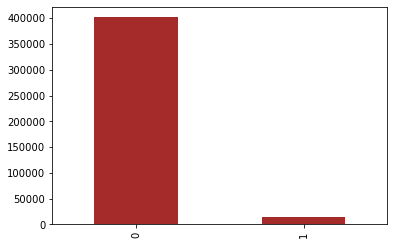

In [47]:
# target variable value counts

mooc['certified'].value_counts().plot.bar(color='brown')
# the dataset is highly skewed as expected.

In [48]:
print( 'The completion rate is : ',round((mooc['certified'].value_counts()[1]/335650)*100,2),"%")

The completion rate is :  4.44 %


In [49]:
# create a column of the dutation of studies

from datetime import datetime

mooc['last_event'] = pd.to_datetime(mooc['last_event'])
mooc['start_time'] = pd.to_datetime(mooc['start_time'])
mooc['duration'] = mooc['last_event'] - mooc['start_time'] 

In [50]:
# Education level of the graduates.

graduates = mooc[mooc["certified"]==1] # new df with the data of the graduates.
graduates.groupby('education')['institute'].count()

education
Bachelor's             5574
Doctorate               421
Less than Secondary     402
Master's               4420
Secondary              4072
Name: institute, dtype: int64

<AxesSubplot:title={'center':'Proportion of graduates in each country'}, xlabel='country'>

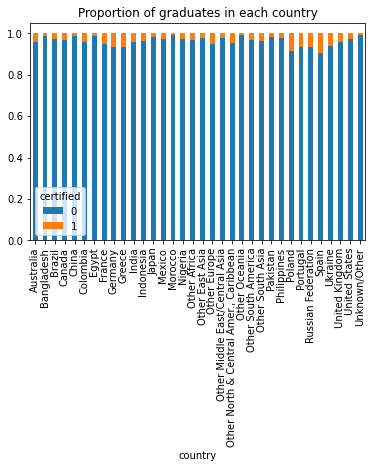

In [31]:
# Visualization of the proportion of graduates in each country of origin.

counts = mooc.groupby(['country', 'certified'])['course_id'].count().unstack()
counts_norm = counts.apply(lambda x: x/x.sum(), axis=1)
counts_norm.plot(kind='bar', stacked=True,title='Proportion of graduates in each country')

<AxesSubplot:>

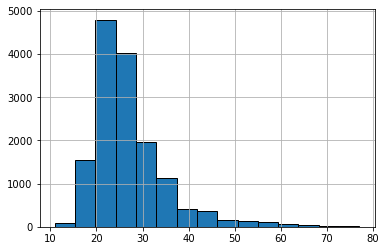

In [51]:
# Age distribution of the graduates

graduates['age'].hist(bins=15, edgecolor='black', linewidth=1.0)

<AxesSubplot:xlabel='Age', ylabel='Frequency'>

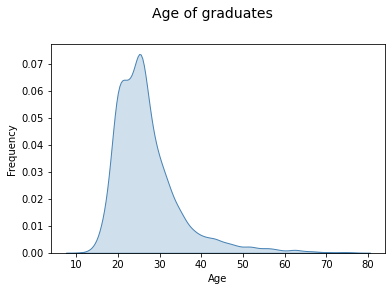

In [52]:
# Density Plot of the Age of the graduates

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Age of graduates", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency") 
sns.kdeplot(graduates['age'], ax=ax1, shade=True, color='steelblue')

There is a right skew in the distribution of age of the graduates.

In [53]:
graduates.describe()

,year,viewed,explored,certified,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,age,duration
count,14889.000000,14889.0,14889.000000,14889.0,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000,14889
mean,2012.571026,1.0,0.955941,1.0,0.833577,4843.478810,43.805695,54263.403922,16.596078,0.112432,26.940896,153 days 00:18:16.755994358
std,0.494946,0.0,0.205234,0.0,0.131431,3999.279959,25.096459,87719.255998,6.779214,0.494311,8.127742,66 days 04:49:17.927203233
min,2012.000000,1.0,0.000000,1.0,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,11.000000,-3 days +00:00:00
25%,2012.000000,1.0,1.000000,1.0,0.740000,1658.000000,25.000000,235.000000,12.000000,0.000000,22.000000,109 days 00:00:00
50%,2013.000000,1.0,1.000000,1.0,0.860000,4138.000000,40.000000,690.000000,16.000000,0.000000,25.000000,142 days 00:00:00
75%,2013.000000,1.0,1.000000,1.0,0.940000,6995.000000,59.000000,197757.000000,18.000000,0.000000,30.000000,187 days 00:00:00
max,2013.000000,1.0,1.000000,1.0,1.000000,53180.000000,162.000000,197757.000000,47.000000,8.000000,77.000000,406 days 00:00:00


From data description we observe that some data cannot be true. First, there is a student that graduated with grade 0 and another one that his studies dure -3 days.

In [67]:
graduates[graduates['grade']<0.5]

,institute,course_id,year,semester,userid,viewed,explored,certified,country,education,grade,start_time,last_event,nevents,ndays_act,nplay_video,nchapters,nforum_posts,age,duration
85849,HarvardX,PH207x,2012,Fall,MHxPC130066792,1,0,1,United States,Bachelor's,0.0,2013-02-01,2013-03-03,56,1,197757,5,0,28,30 days


In [70]:
graduates[graduates['duration']< '0 days']

,institute,course_id,year,semester,userid,viewed,explored,certified,country,education,grade,start_time,last_event,nevents,ndays_act,nplay_video,nchapters,nforum_posts,age,duration
46568,HarvardX,PH207x,2012,Fall,MHxPC130531263,1,1,1,Australia,Secondary,0.96,2013-01-23,2013-01-20,8253,47,1447,14,0,24,-3 days


In [54]:
# drop the above two lines

graduates = graduates.drop(graduates[graduates['grade']<0.5].index)
graduates = graduates.drop(graduates[graduates['duration']< '0 days'].index)

In [55]:
graduates.describe()

,year,viewed,explored,certified,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,age,duration
count,14887.000000,14887.0,14887.000000,14887.0,14887.000000,14887.000000,14887.000000,14887.000000,14887.000000,14887.000000,14887.000000,14887
mean,2012.571102,1.0,0.956002,1.0,0.833625,4843.571371,43.808356,54257.312890,16.597031,0.112447,26.941022,153 days 00:45:16.141600054
std,0.494935,0.0,0.205098,0.0,0.131258,3999.258488,25.095679,87716.196031,6.778969,0.494343,8.128247,66 days 04:26:51.435144864
min,2012.000000,1.0,0.000000,1.0,0.500000,4.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0 days 00:00:00
25%,2012.000000,1.0,1.000000,1.0,0.740000,1658.000000,25.000000,235.000000,12.000000,0.000000,22.000000,109 days 00:00:00
50%,2013.000000,1.0,1.000000,1.0,0.860000,4138.000000,40.000000,689.000000,16.000000,0.000000,25.000000,142 days 00:00:00
75%,2013.000000,1.0,1.000000,1.0,0.940000,6994.500000,59.000000,197757.000000,18.000000,0.000000,30.000000,187 days 00:00:00
max,2013.000000,1.0,1.000000,1.0,1.000000,53180.000000,162.000000,197757.000000,47.000000,8.000000,77.000000,406 days 00:00:00


Observations:

    1. The mean graduation grade is 83.3%
    
    2. Graduate Students where on average 44 days active in the platform
    
    3. The duration of studies of students who finally graduated ranges from 109 to 406

In [56]:
# we need to drop those lines from the mooc data too..

mooc = mooc.drop(mooc[mooc['duration']< '0 days'].index) # only 1231 lines

In [57]:
mooc['duration'] = mooc['duration'].dt.days               # change dtype
graduates['duration'] = graduates['duration'].dt.days

Text(0.5, 0, 'Duration of studies - Graduated')

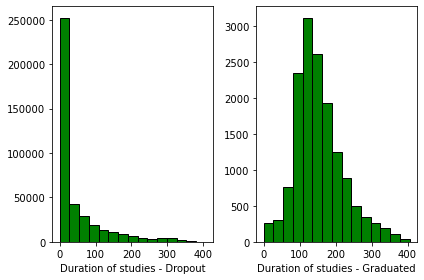

In [14]:
# Plot the duration of studies for the Target 

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(mooc[mooc['certified']==0]['duration'], bins=15,edgecolor='black',color='green')
axs[0].set_xlabel("Duration of studies - Dropout")
axs[1].hist(graduates['duration'], bins=15,edgecolor='black',color='green')
axs[1].set_xlabel("Duration of studies - Graduated")

([<matplotlib.patches.Wedge at 0x1f8a6ad4700>,
 [Text(0.45077724594009305, 1.003394177052401, 'fall'),
  Text(-0.594369231617251, -0.9255945205686553, 'spring'),
  Text(1.0878766045184052, -0.16286341928593293, 'summer')])

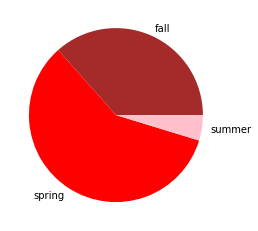

In [23]:
# Number of students in each semester.

plt.pie(mooc.groupby('semester').count()['course_id'],labels =['fall','spring','summer'],
        colors=['brown','red','pink'])
# Spring is the most popular season to take a mooc.

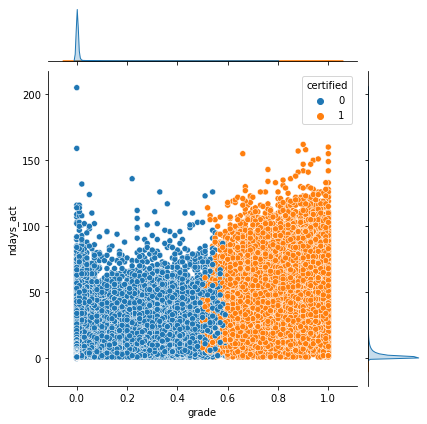

In [37]:
# Scatterplot of the number of days a student visited the platform and the final grade.

import seaborn as sns
sns.jointplot(data=mooc, x="grade", y="ndays_act", hue="certified")

Students with more interaction with the online platform tend to achive higher grades and finally graduate.

C:\Users\B590\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


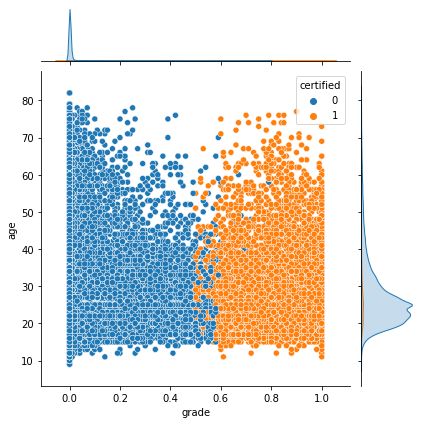

In [58]:
# Scatterplot of the grades and the age of enrollment of the student.
sns.jointplot(data=mooc, x="grade", y="age", hue="certified")

Students more than 40 years old tend to achive either really low or pretty high grades.